<a href="https://colab.research.google.com/github/RFJC21/bike_demand_prediction/blob/master/bike_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# ver se o target e normalized. se nao for, log transformation
# drop outliers
# dummy variables
# autocorrelation
# multicoliniarity (pode ser com heatmap, valores proximos de 0 e 1)
# p-values

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import datetime, os
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hour.csv to hour.csv


In [51]:
import io
df = pd.read_csv(io.BytesIO(uploaded['hour.csv']))
df.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
year,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
month,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hour,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weather,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


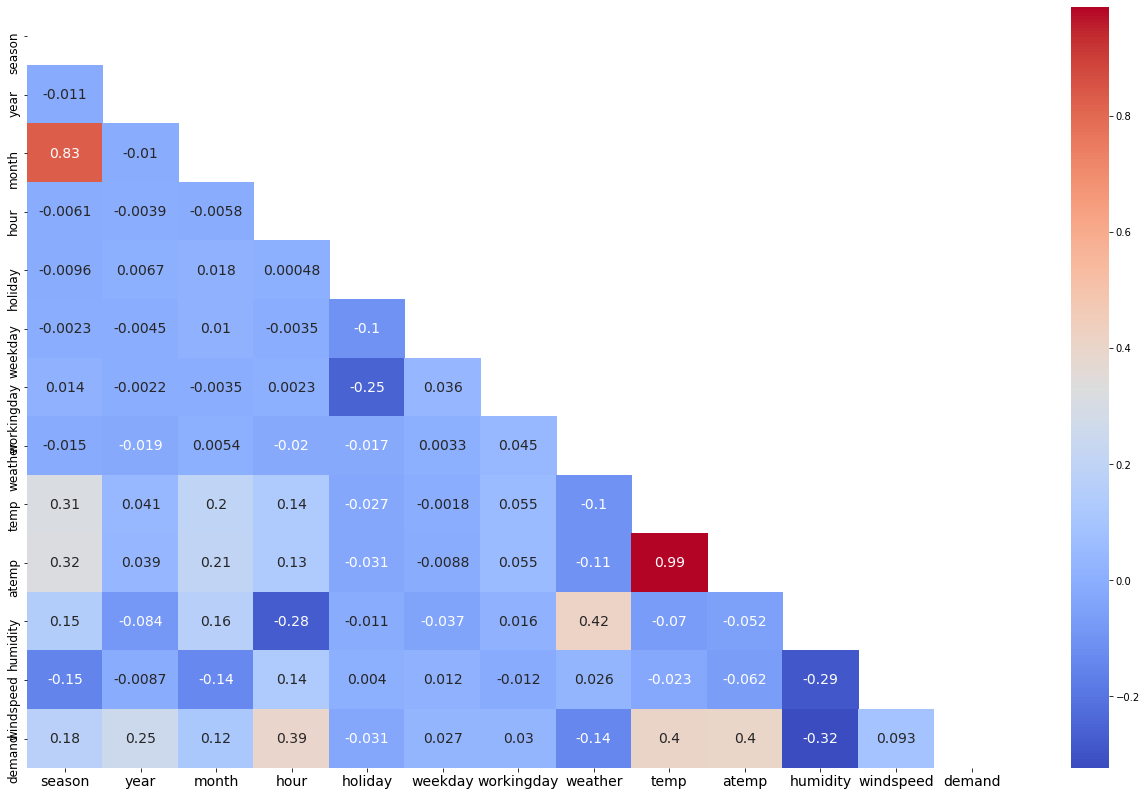

In [22]:
mask=np.zeros_like(df.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

plt.figure(figsize=(22,14))
sns.heatmap(df.corr(), mask=mask, cmap="coolwarm",annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [0]:
#drop atemp, windspeed, weekday

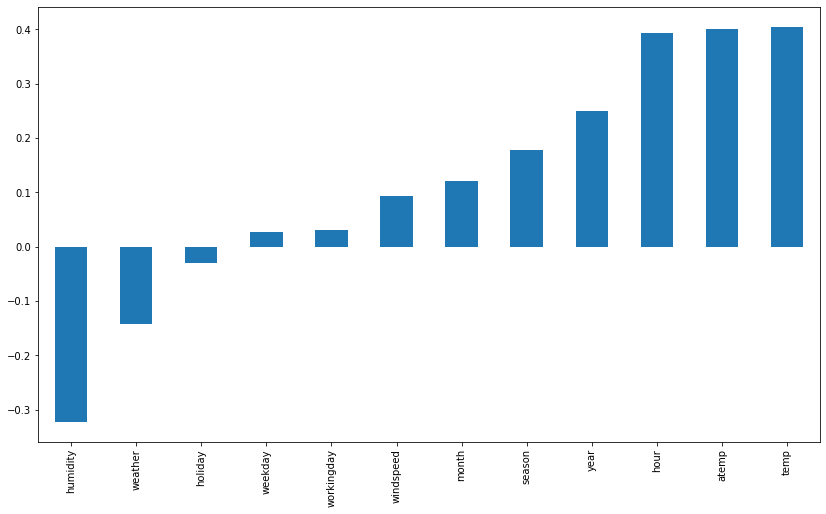

In [24]:
plt.figure(figsize=(14,8))
df.corr()['demand'].sort_values().drop('demand').plot(kind='bar')

# Drop Features

In [0]:
df=df.drop(['date', 'casual', 'registered'],axis=1)

In [0]:
df=df.drop('weekday',axis=1)

# See if our target is normalized

In [6]:
# = 0 é
df['demand'].skew()

1.2774116037490577

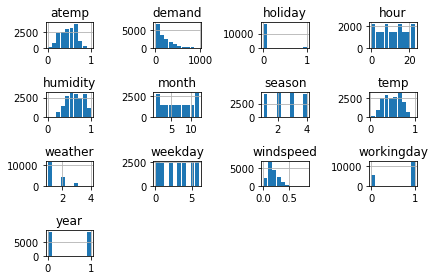

In [8]:
# it is not normalized !! podemos ter de aplicar Log!!
df.hist(rwidth = 0.9)
plt.tight_layout()

# Exploratory analysis of the continuous variables

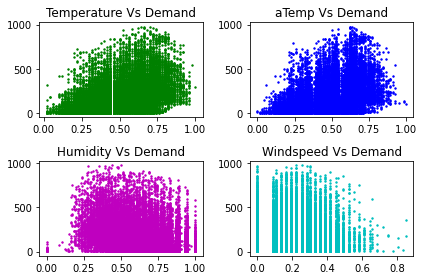

In [11]:
# ----------------------------------------------
# Step 3 - Data Visualisation
# ----------------------------------------------
#
# Visualise the continuous features Vs demand
plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(df['temp'], df['demand'], s=2, c='g')

plt.subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(df['atemp'], df['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(df['humidity'], df['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(df['windspeed'], df['demand'], s=2, c='c')

plt.tight_layout()

# Exploratory analysis of the categorical variables

In [0]:
bikes_prep=df

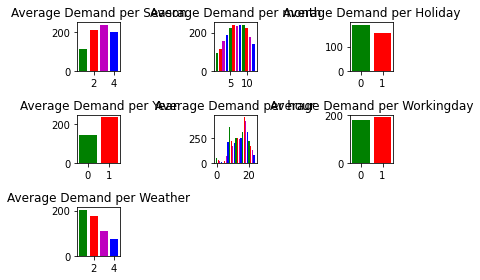

In [27]:
# Visualise the categorical features
colors = ['g', 'r', 'm', 'b']

plt.subplot(3,3,1)
plt.title('Average Demand per Season')
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,2)
plt.title('Average Demand per month')
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,3)
plt.title('Average Demand per Holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,4)
plt.title('Average Demand per Year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,5)
plt.title('Average Demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,6)
plt.title('Average Demand per Workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,7)
plt.title('Average Demand per Weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.tight_layout()

# Check and drop outliers

In [30]:
df['demand'].mean()

189.46308763450142

In [31]:
df['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [0]:
# ou

In [8]:
len(df)*0.01

173.79

In [0]:
non_top_1per=df.sort_values('demand',ascending=False).iloc[173:]
df=non_top_1per

In [10]:
df['demand'].mean()

182.8655701499477

# Check for multicoliniarity

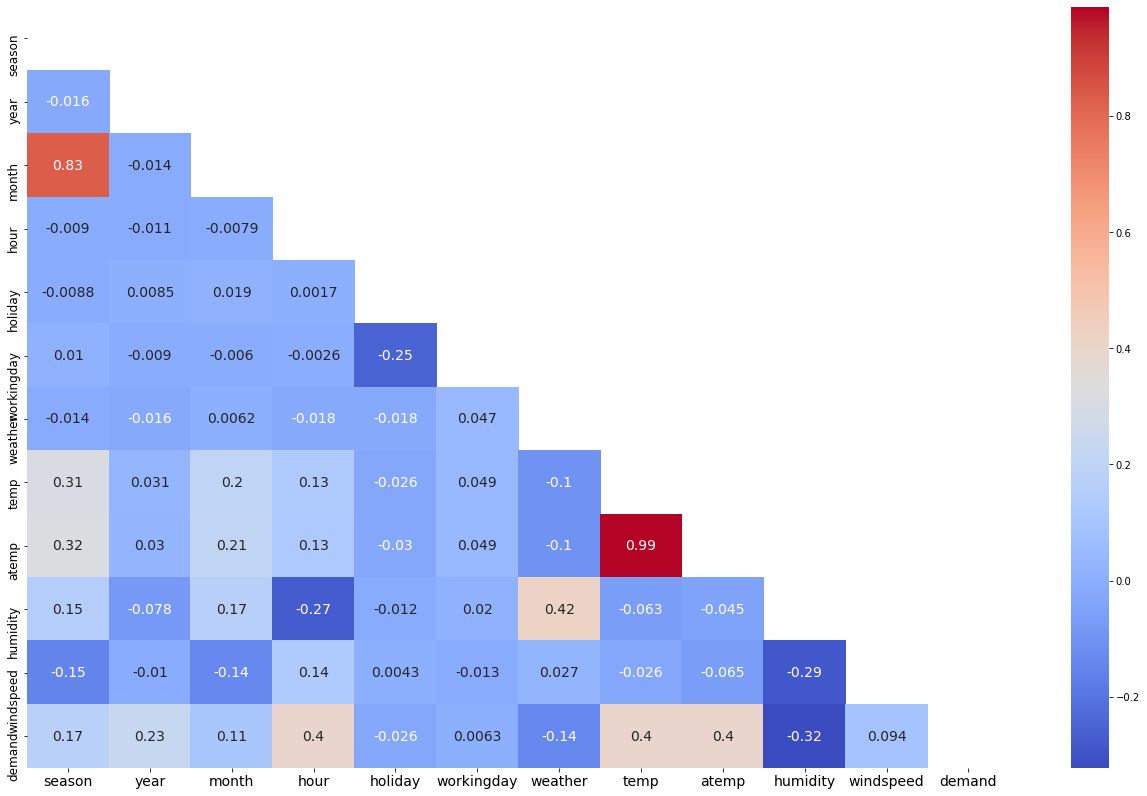

In [36]:
mask=np.zeros_like(df.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

plt.figure(figsize=(22,14))
sns.heatmap(df.corr(), mask=mask, cmap="coolwarm",annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

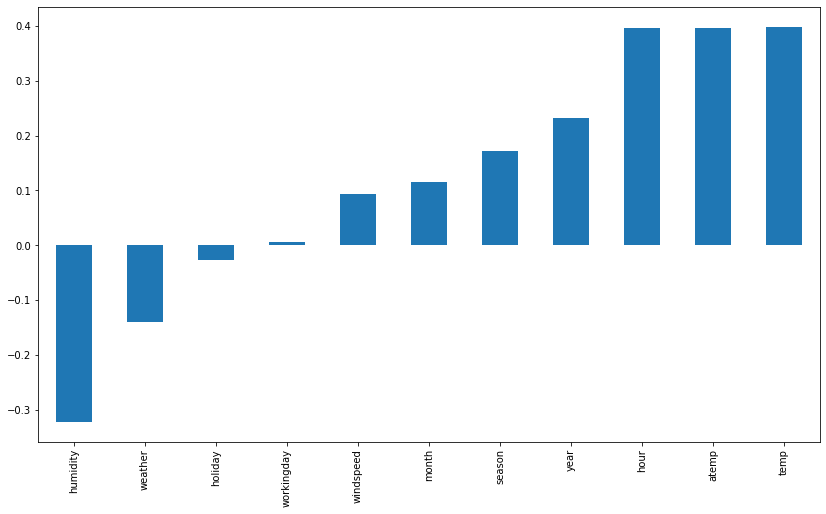

In [35]:
plt.figure(figsize=(14,8))
df.corr()['demand'].sort_values().drop('demand').plot(kind='bar')

In [0]:
df=df.drop(['workingday', 'windspeed', 'atemp','year'],axis=1)

# Autocorrelation

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474795, 0.47049642, 0.49622893, 0.49404147, 0.46796018,
        0.47732133, 0.5267586 , 0.59145856, 0.65201694, 0.7151968 ,
        0.8059117 , 0.9253113 , 1.        , 0.9253113 , 0.8059117 ,
        0.7151968 , 0.65201694, 0.59145856, 0.5267586 , 0.47732133,
        0.46796018, 0.49404147, 0.49622893, 0.47049642, 0.45474795],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7fd37c0d7e48>)

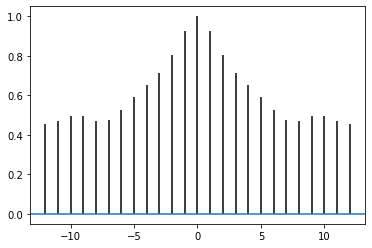

In [44]:
# high autocorrelation
dff1 = pd.to_numeric(bikes_prep['demand'], downcast='float')
plt.acorr(dff1, maxlags=12)

# Solve not normalized data problem

In [57]:
df=df.sort_values('index',ascending=True)
df.head()

,index,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,1,0,0,1,0.24,0.81,16
1,2,1,1,1,0,1,0.22,0.80,40
2,3,1,1,2,0,1,0.22,0.80,32
3,4,1,1,3,0,1,0.24,0.75,13
4,5,1,1,4,0,1,0.24,0.75,1


In [0]:
df=df.drop('index', axis=1)

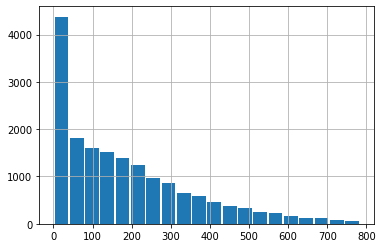

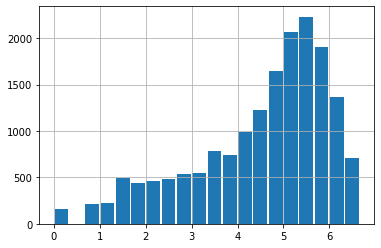

In [59]:
df1 = df['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)

df['demand'] = np.log(df['demand'])

# Solve Autocorrelation problem

In [60]:
# Solve the problem of Autocorrelation
# Shift the demand by 3 lags

t_1 = df['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = df['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = df['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

df_lag = pd.concat([df, t_1, t_2, t_3], axis=1)

df_lag = df_lag.dropna()

df_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


# Dummy Variables

In [63]:
df_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [64]:
df_lag.select_dtypes(['object']).columns

Index([], dtype='object')

In [0]:
#se nao forem object
df_lag['season'] = df_lag['season'].astype('category')
df_lag['holiday'] = df_lag['holiday'].astype('category')
df_lag['weather'] = df_lag['weather'].astype('category')
df_lag['month'] = df_lag['month'].astype('category')
df_lag['hour'] = df_lag['hour'].astype('category')


In [66]:
df_lag.dtypes

season      category
month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
t-1          float64
t-2          float64
t-3          float64
dtype: object

In [67]:
df_lag = pd.get_dummies(df_lag, drop_first=True)
df_lag.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
df_lag.shape

(17203, 47)

#Split Data

In [0]:
# Demand is time dependent (time series)

In [0]:
Y = df_lag[['demand']]
X = df_lag.drop(['demand'], axis=1)

tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]

# Create Model

#Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
# r_squared for trainning and test data
print('Trainning data r_squared: ', regressor.score(X_train,Y_train))
print('Test data r_squared: ', regressor.score(X_test,Y_test))

Trainning data r_squared:  0.9190093760450864
Test data r_squared:  0.9248797502027664


In [0]:
y_pred = regressor.predict(X_test)

In [76]:
y_pred

array([[5.82768809],
       [5.77742707],
       [5.68228725],
       ...,
       [4.28152926],
       [4.20590413],
       [3.6499407 ]])

In [77]:
import math
from sklearn.metrics import mean_squared_error

mlr_rmse_LR = math.sqrt(mean_squared_error(Y_test, y_pred))
mlr_rmse_LR

0.38661602340212825

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

MAE_LR=mean_absolute_error(Y_test,y_pred)
MAE_LR

0.28451472134237094

In [79]:
df_lag['demand'].mean()

4.514146326144051

# log values back to normal

In [81]:
# Exponent opposite to log

Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(y_pred[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)

0.3613894480610763


# SVR

In [0]:
from sklearn.svm import SVR

In [85]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = regressor.predict(X_test)

In [87]:
mlr_rmse_LR = math.sqrt(mean_squared_error(Y_test, y_pred))
mlr_rmse_LR

0.3336367274194489

In [88]:
# Exponent opposite to log

Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(y_pred[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)

0.312625123822937
